<a href="https://colab.research.google.com/github/vino061005/first/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving house_price_dataset.csv to house_price_dataset.csv


First 5 Rows of the Dataset:
   Area (sqft)  Bedrooms  Bathrooms  Stories  Parking  Mainroad  Guestroom  \
0         1360         4          1        1        0         1          1   
1         1794         4          3        2        1         1          0   
2         1630         4          2        1        2         0          1   
3         1595         3          1        1        0         1          0   
4         2138         3          1        1        0         0          0   

   Basement  Hotwaterheating  Airconditioning    Price  
0         0                0                0  5100673  
1         1                0                0  2534026  
2         1                0                1  1315826  
3         0                0                1  4467366  
4         1                0                1  7897061  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dty

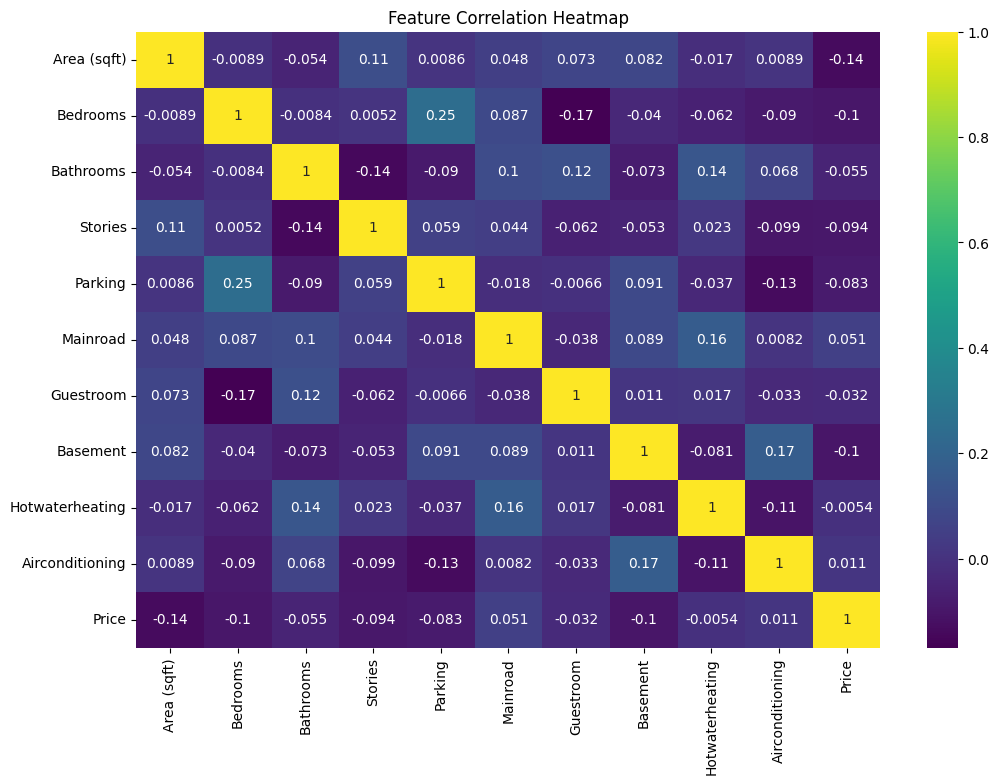


Model Evaluation:
R² Score: -0.3627715431195975
Mean Squared Error: 5291726668708.349
Root Mean Squared Error: 2300375.3321378552


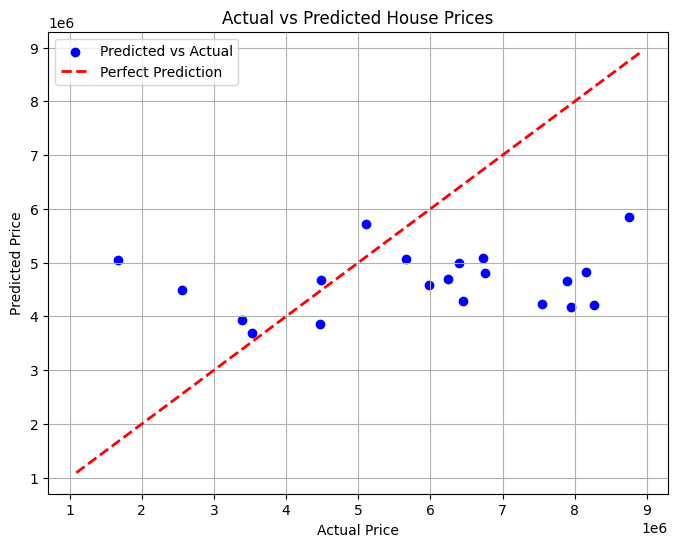

In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('house_price_dataset.csv')

# Display first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Check basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Evaluation:")
print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()